In [1]:
import torch
x = torch.rand(5, 3)
x

tensor([[0.4944, 0.0520, 0.3920],
        [0.2140, 0.7689, 0.7687],
        [0.9646, 0.8432, 0.1696],
        [0.0177, 0.0267, 0.5162],
        [0.4855, 0.0291, 0.3166]])

In [2]:
x = torch.arange(12)
x.numel()

12

In [3]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [4]:
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [5]:
torch.randn(3, 4)

tensor([[ 0.5556,  0.7996, -0.1413, -0.3947],
        [ 0.3560, -1.6221, -1.1335,  1.6087],
        [-2.1508,  0.1381, -0.3435, -0.1641]])

In [6]:
x = torch.tensor([1, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x / y, x ** y

(tensor([ 3,  4,  6, 10]),
 tensor([-1,  0,  2,  6]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1,  4, 16, 64]))

In [7]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [8]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [9]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [10]:
X.sum()

tensor(66.)

In [11]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [12]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [13]:
A = X.numpy()
B = torch.tensor(A)
A, type(A), B, type(B)

(array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=float32),
 numpy.ndarray,
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 torch.Tensor)

In [14]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

In [15]:
A[1][1]

5.0

In [16]:
torch.norm(B)

tensor(22.4944)

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

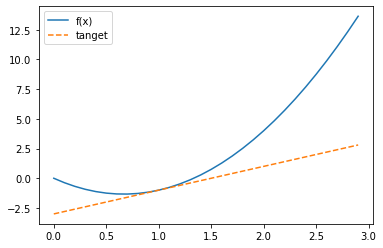

In [21]:
x = np.arange(0, 3, 0.1)
def f(x):
    return 3 * x ** 2 - 4 * x
plt.plot(x, [f(i) for i in x], label='f(x)')
plt.plot(x, [2 * i - 3 for i in x], label='tanget', linestyle='--')
plt.legend()
plt.show()

In [22]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [23]:
x.requires_grad_(True)
x.grad

In [25]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [27]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [31]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [35]:
x.grad.zero_()
y = x * x
y.sum().backward()
x, x.grad, y

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor([0., 2., 4., 6.]),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>))

In [38]:
u = y.detach()
u

tensor([0., 1., 4., 9.])

In [42]:
x.grad.zero_()
z = u * x
z.sum().backward()
x.grad

tensor([0., 1., 4., 9.])

In [48]:
from torch.distributions import multinomial

In [49]:
fair_probs = torch.ones([6])/6
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [75]:
n = 100000
counts = multinomial.Multinomial(10, fair_probs).sample((1000,))
counts

tensor([[2., 2., 1., 2., 0., 3.],
        [0., 2., 3., 1., 2., 2.],
        [0., 2., 4., 2., 1., 1.],
        ...,
        [4., 1., 0., 4., 0., 1.],
        [1., 1., 0., 3., 2., 3.],
        [3., 1., 3., 1., 1., 1.]])

In [76]:
cum_counts = counts.cumsum(dim=0)
cum_counts

tensor([[2.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00],
        [2.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00, 2.0000e+00, 5.0000e+00],
        [2.0000e+00, 6.0000e+00, 8.0000e+00, 5.0000e+00, 3.0000e+00, 6.0000e+00],
        ...,
        [1.6740e+03, 1.6620e+03, 1.5840e+03, 1.6570e+03, 1.6780e+03, 1.7250e+03],
        [1.6750e+03, 1.6630e+03, 1.5840e+03, 1.6600e+03, 1.6800e+03, 1.7280e+03],
        [1.6780e+03, 1.6640e+03, 1.5870e+03, 1.6610e+03, 1.6810e+03, 1.7290e+03]])

In [77]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates

tensor([[0.2000, 0.2000, 0.1000, 0.2000, 0.0000, 0.3000],
        [0.1000, 0.2000, 0.2000, 0.1500, 0.1000, 0.2500],
        [0.0667, 0.2000, 0.2667, 0.1667, 0.1000, 0.2000],
        ...,
        [0.1677, 0.1665, 0.1587, 0.1660, 0.1681, 0.1728],
        [0.1677, 0.1665, 0.1586, 0.1662, 0.1682, 0.1730],
        [0.1678, 0.1664, 0.1587, 0.1661, 0.1681, 0.1729]])

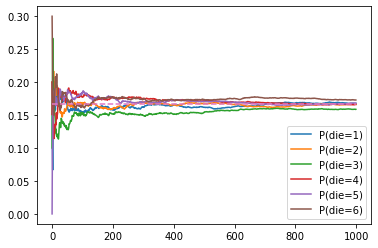

In [80]:
for i in range(6):
    plt.plot(estimates[:, i].numpy(), label='P(die=%d)'%(i+1))
plt.plot([-1, len(estimates)], [1/6, 1/6], '--')
plt.legend()
plt.show()    

In [83]:
import time
class Timer():
    def __init__(self):
        self.times = []
        self.start()
    def start(self):
        self.tik = time.time()
    def stop(self):
        self.times.append(time.time()-self.tik)
        return self.times[-1]
    def avg(self):
        return sum(self.times) / len(self.times)
    def sum(self):
        return sum(self.times)
    def cumsum(self):
        return np.array(self.times.cumsun().tolist())   

In [87]:
n = 100000
a = torch.ones([n])
b = torch.ones([n])
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f}sec'


'1.21279sec'

In [88]:
timer.start()
d = a + b
f'{timer.stop():.5f}sec'

'0.00000sec'